# **Lab Session 06 : MLP - Part1**

**Exercise 0: Check scikit-learn version**

---
Because default scikit-learn version of colab is higher than 0.21.3, you have to type the command
below.

After installation, you have to restart the runtime.

In [5]:
import sklearn as s
s.__version__

'1.6.1'

---
**Exercise 1: Install Tensorﬂow 2**


This exercise is based on the example in Section "Installing Tensorﬂow 2" on in the
textbook.

Just check the existence of tensorﬂow and its version.

***Note: You have to import tensorflow and keras before checking version.***





In [4]:
import tensorflow as tf
from tensorflow import keras

In [6]:
tf.__version__

'2.18.0'

In [7]:
keras.__version__

'3.8.0'



---






**Exercise 2: Building an Image Classiﬁer Using Sequential API**


This exercise is based on the example in Section "Building an Image Classiﬁer Using Sequential API" in the textbook.

Keras provides some utility functions to fetch and load common datasets.

Let’s load a dataset called "***Fashion MNIST***".



In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


*You can check the shape and the data type of the dataset.*

In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_train_full.dtype

dtype('uint8')

[링크 텍스트](https://)*Note that the dataset is already split into a training set and a test set, but there is no validation set, so we’ll create one now.*

In [11]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

You can assign the class name to the labels in "***Fashion MNIST***".

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
y_train[0]

np.uint8(4)

In [14]:
class_names[y_train[0]] # class_names[4]

'Coat'



---

**Exercise 3: Creating the model using the Sequential API**

This exercise is based on the example in Section "Creating the model using the Sequential API" in the textbook.

Creating model consists of the following two steps.

1. Create a Sequential model

2. Add some layers. There are two types of layers:

> *   ***Flatten***: convert an input image into a 1D array.

> *   ***Dense***: create a layer that contains all connections between the neurons in the layer and the
previous layer.




In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10,activation = "softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


*You can see the information of the model by the following command.*

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

***You can find out the information of the layers in the model by the following commands.***

In [17]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [18]:
hidden1 = model.layers[1]

In [19]:
hidden1.name

'dense'

*All parameters of layers can be accessed by using a member function called get_weights().*

In [20]:
weights, biases = hidden1.get_weights()
print(weights)

[[ 0.00066581  0.06959775 -0.03483204 ...  0.01375537 -0.06731173
  -0.01223617]
 [ 0.05663539 -0.02433069  0.00321525 ... -0.00584833  0.04460664
  -0.01871856]
 [-0.01615277 -0.05892939 -0.06335344 ...  0.01838523 -0.03915876
   0.02640042]
 ...
 [-0.04204845 -0.04979778 -0.04963635 ...  0.04180518  0.00801102
   0.05541357]
 [ 0.03966234 -0.02517718  0.02614898 ...  0.0463397  -0.00413425
   0.05529962]
 [ 0.06705093  0.04790783  0.02094894 ... -0.00304464 -0.05858875
  -0.06829439]]


In [21]:
weights.shape

(784, 300)

In [22]:
biases.shape

(300,)



---

# **Exercise 4: Train the model**


This exercise is based on the examples in Section "Compiling the model, Training and evaluating
the model" in the textbook.

After the model is created, you can specify the loss function and the optimizer by a member function called `compile()`.


In [23]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics=["accuracy"])

`fit()` *will train the model.*

In [24]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6671 - loss: 1.0375 - val_accuracy: 0.8248 - val_loss: 0.5185
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8232 - loss: 0.5115 - val_accuracy: 0.8078 - val_loss: 0.5391
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8385 - loss: 0.4621 - val_accuracy: 0.8506 - val_loss: 0.4360
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8503 - loss: 0.4265 - val_accuracy: 0.8624 - val_loss: 0.3972
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8577 - loss: 0.4040 - val_accuracy: 0.8650 - val_loss: 0.3981
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8639 - loss: 0.3908 - val_accuracy: 0.8534 - val_loss: 0.3987
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8685 - loss: 0.3734 - val_accuracy: 0.8660 - val_loss: 0.3825
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8751 - loss: 0.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

By using `pandas`, you can calculate the loss, the accuracy, the validation loss, and the validation accuracy in each epoch. You can show these information in a graph.

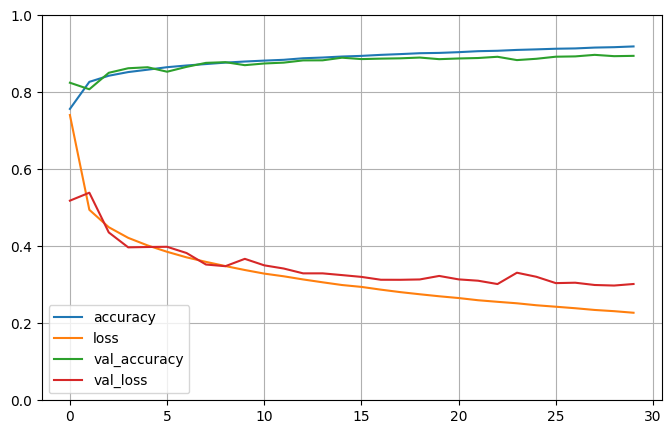

In [26]:
pd.DataFrame(history.history).plot(figsize=(8,5))
#weights, biases d(True)
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

---
# **Exercise 5: Evaluate the model and make a prediction**

This exercise is based on the example in Section "Training and evaluating the model, Using the model to make a prediction" in the textbook.

If you are not satisﬁed with the performance of the model, you can change the hyperparameter of the model.

After tuning, you should evaluate the model to estimate the generalization error by using a member function called `evaluate()`.


In [27]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8392 - loss: 68.8182


[72.28777313232422, 0.8360000252723694]

*The first three instances of the test data will be used for prediction. As you can see, for each instance the model estimates one probability per class, from class 0 to class 9. For example, for the ﬁrst image it estimates that the probability of class 9 is 100% and the probabilities of the other classes are negligible.*

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

*If you only care about the class with the highest estimated probability (even if that probability is quite low), then you can use the* `predict_classes()` *method.*

In [29]:
y_pred = model.predict(X_new)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[9 2 1]


*You can also see class name of the predicted output.*

In [30]:
import numpy as np
print(np.array(class_names)[y_pred])

['Ankle boot' 'Pullover' 'Trouser']


*The same output of y_pred and y_new means that the model is exact.*

In [31]:
y_new = y_test[:3]
print(y_new)
print(np.array(class_names)[y_new])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']




---


# **Exercise 6: Building Regression MLP Using Sequential API**

This exercise is based on the example in Section "Building Regression MLP Using Sequential API" in the textbook.

Let’s consider the California housing dataset and model it by regression.

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

*After loading the data, we split it into a training set, a validation set, and a test set, and we scale all the features.*

In [33]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Using the Sequential API to build, train, evaluate, and use a regression MLP to make predictions is quite similar to what we did for classiﬁcation.

The differences are:
- The output layer has a single neuron.
- Mean squared error is used in the loss function.
- Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons in order to avoid overﬁtting.

In [39]:
model = keras.models.Sequential([keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), keras.layers.Dense(1)])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.3713 - val_loss: 0.5081
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7472 - val_loss: 0.5030
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5069 - val_loss: 0.4475
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4475 - val_loss: 0.4241
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4348 - val_loss: 0.4123
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4231 - val_loss: 0.4041
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4101 - val_loss: 0.4027
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4131 - val_loss: 0.3938
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3879 - val_loss: 0.3942
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3897 - val_loss: 0.3862
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3962 - val_loss: 0.3893
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.



---


# **Exercise 7: Building Complex Models Using the Functional API**

This exercise is based on the example in Section "Building Complex Models Using the Functional API" in the textbook.

A Wide & Deep neural network is one example of nonsequential neural networks.

It connects all or part of the inputs directly to the output layer.

1. Create a "`Input`" object.

2. Create two "`Dense`" layers with 30 neurons.

3. Create a concatenate layer "`concat`" to concatenate the input and the output of the second hidden layer.

4. Create an "`output`" layer.

5. Create a model.

In [41]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input], outputs = [output])

*The input layer could contain a subset of features of the entire input dataset. You can check the figure in the textbook.*

In [42]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs =[output])

*Compile and train the complex model.*

In [43]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.8982 - val_loss: 0.9792
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.8504 - val_loss: 0.7027
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6964 - val_loss: 0.6512
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6485 - val_loss: 0.6259
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6216 - val_loss: 0.6068
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6074 - val_loss: 0.5903
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5925 - val_loss: 0.5775
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5895 - val_loss: 0.5662
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5681 - val_loss: 0.5548
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5656 - val_loss: 0.5467
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5534 - val_loss: 0.5391
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

There are many use cases in which you may want to have multiple outputs:
- The task may demand it (e.g., regression and classiﬁcation).
- Simiarly, you may have multiple independent tasks based on the same data.
- Regularization technique.


Adding extra outputs is quite easy:
just connect them to the appropriate layers and add them to your model's list of outputs.

In [44]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [45]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - aux_output_loss: 3.2526 - loss: 1.6252 - main_output_loss: 1.4444 - val_aux_output_loss: 1.1099 - val_loss: 0.5537 - val_main_output_loss: 0.4918
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - aux_output_loss: 1.0358 - loss: 0.5525 - main_output_loss: 0.4988 - val_aux_output_loss: 0.9026 - val_loss: 0.5161 - val_main_output_loss: 0.4731
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.8700 - loss: 0.5220 - main_output_loss: 0.4833 - val_aux_output_loss: 0.7989 - val_loss: 0.4995 - val_main_output_loss: 0.4661
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.7630 - loss: 0.4879 - main_output_loss: 0.4573 - val_aux_output_loss: 0.7290 - val_loss: 0.4807 - val_main_output_loss: 0.4531
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - aux_output_loss: 0.6954 - loss: 0.4611 - main_output_loss: 0.4351 - val_aux_output_loss: 0.6963 - val_loss: 0.4754 - val_main_output_loss: 0.4508


In [46]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test,
                                                                        y_test])

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - aux_output_loss: 0.4520 - loss: 0.3617 - main_output_loss: 0.3517


In [47]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
